In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import calendar

import datetime as dt

%matplotlib inline  

Text(0.5, 69.0, 'Months')

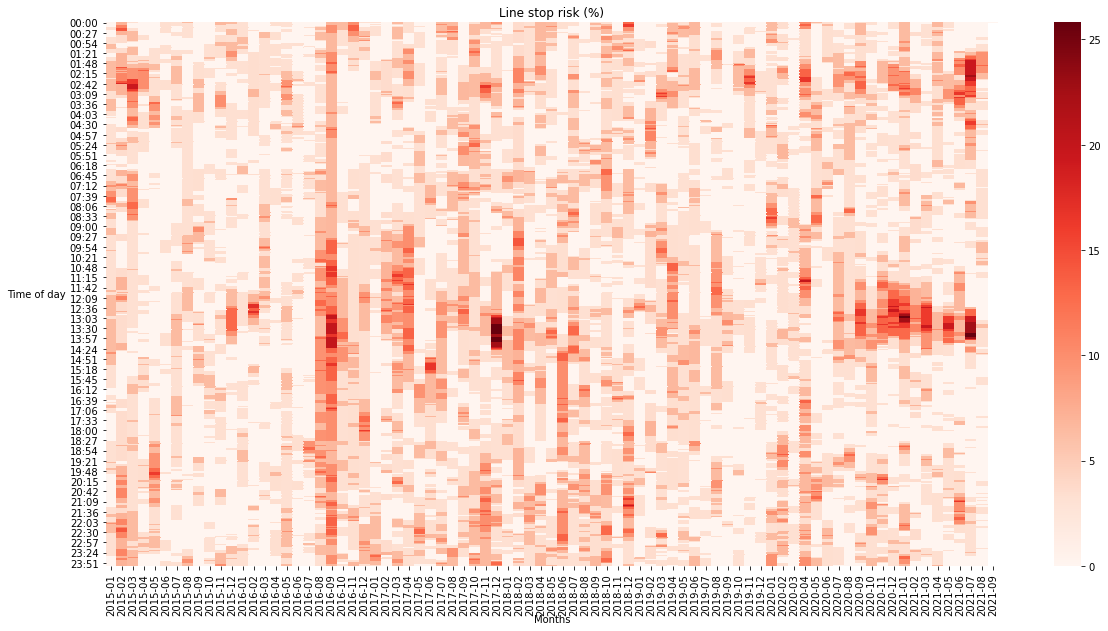

In [24]:
inicio  = pd.to_datetime(dt.date(2015, 1, 1))
fim = pd.to_datetime(dt.date(2021, 9, 1))

#Carrega paradas de linha
df_par = pd.read_parquet('LineStop.parquet')
df_par = df_par.loc[(df_par['Start_Date']>=inicio)&(df_par['End_Date']<fim)]
df_par = df_par.loc[df_par['Responsible'].str.contains('Operator',case=False)]

#Cria o dataframe temporal
rng = pd.date_range(inicio, fim, freq='min')
df = pd.DataFrame({ 'Data':rng})
df['Minuto'] = df['Data'].dt.strftime('%H:%M')
df['Hora'] = df['Data'].dt.strftime('%H')
df['Dia'] = df['Data'].dt.strftime('%d')
df['Mes'] = df['Data'].dt.strftime('%m')
df['Ano'] = df['Data'].dt.strftime('%Y-%m')


for i, row in df_par.iterrows():
    df.loc[(df['Data']>=row['Start_Date'])&(df['Data']<row['End_Date']),['Responsible','Reason']] = row['Responsible'],row['Reason']

df.loc[df['Responsible'].isnull()==True,'Responsible'] = 0
df.loc[df['Responsible']!=0,'Responsible'] = 1/df['Data'].dt.days_in_month

tabela = pd.pivot_table(df, values = 'Responsible', index=['Minuto'], columns=['Ano'], aggfunc=np.sum)   

# convert to percent
tabela = tabela*100

heatmap, ax = plt.subplots(figsize=(20,10))
sns.heatmap(tabela, ax=ax,cmap='Reds',cbar=True)

ax.set_title('Line stop risk (%)', fontsize=12)
ax.set_ylabel('Time of day', fontsize=10, rotation=0, ha='right',va='center')
ax.set_xlabel('Months', fontsize=10, rotation=0, ha='center',va='center')